In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor

from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_excel('D:/Project series/Flight Price Prediction/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

There are 10683 instances each is having 11 different features.

In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


The maximum ticket price is Rs.79512 and minimum is Rs.1759.

In [ ]:
df.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [ ]:
print(df['Source'].unique())
df['Destination'].unique()

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

All the flight are from 5 different cities to all other 6 different cities except the same city.

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is only single entry is missing in Route and Total_stops.

#### Sorting the entire dataset on date of journey.

In [ ]:
df.sort_values('Date_of_Journey', inplace = True)

#### Converting the Date_of_journey into date, month and year.

In [ ]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [ ]:
df['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', 'No Info', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

Text(0, 0.5, 'Price of ticket')

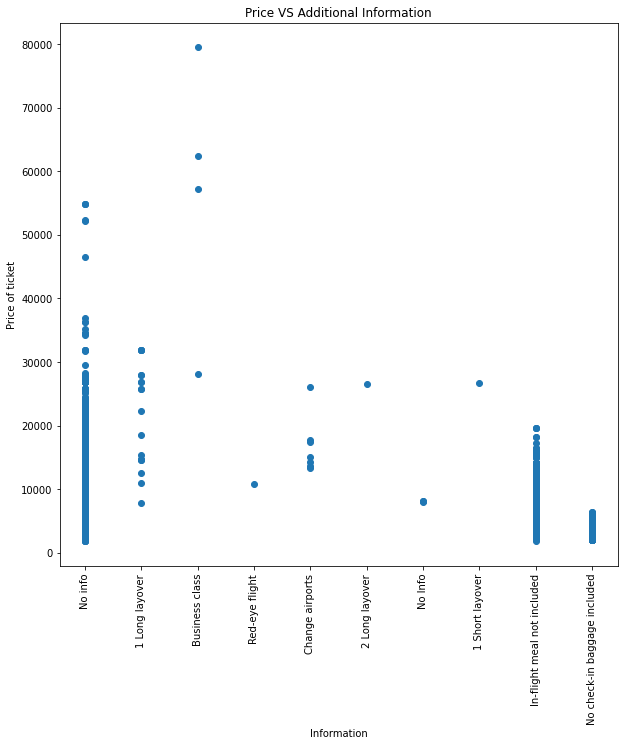

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Additional Information')
plt.scatter(df['Additional_Info'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious.

Text(0, 0.5, 'Count of flights')

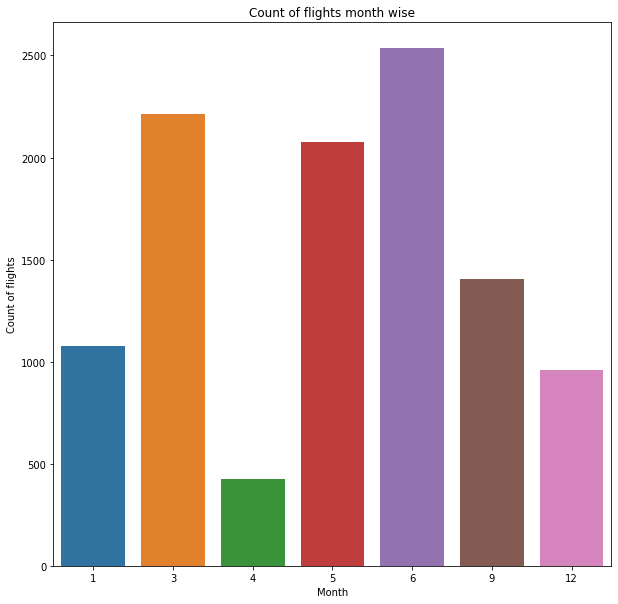

In [ ]:
plt.figure(figsize = (10 , 10))
plt.title('Count of flights month wise')
sns.countplot(x = 'month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

There are around 2500 flights scheduled in the month of may so at this time can be the peak month for the airlines as compared to april which seems like slack season for airlines.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

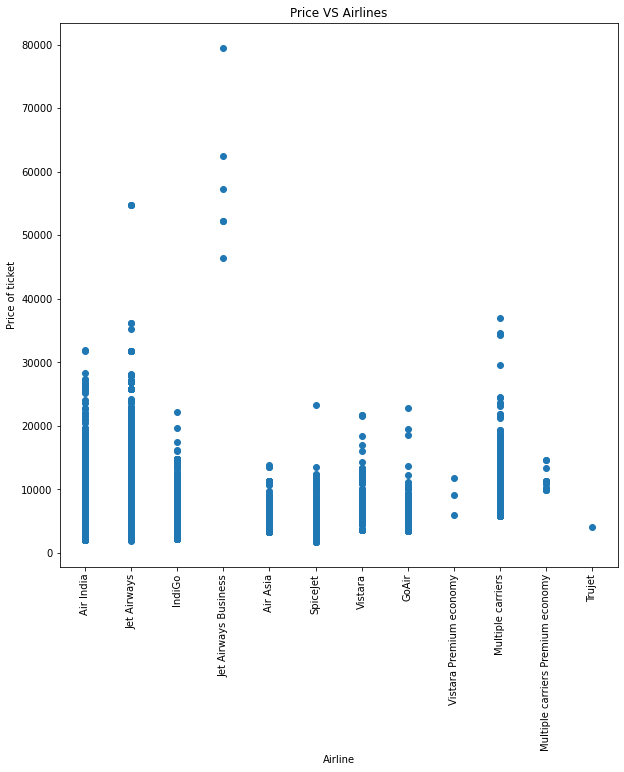

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

The ticket rate for Jet Airways Business airline is high.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Air India'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'IndiGo'),
  Text(3, 0, 'Jet Airways Business'),
  Text(4, 0, 'Air Asia'),
  Text(5, 0, 'SpiceJet'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

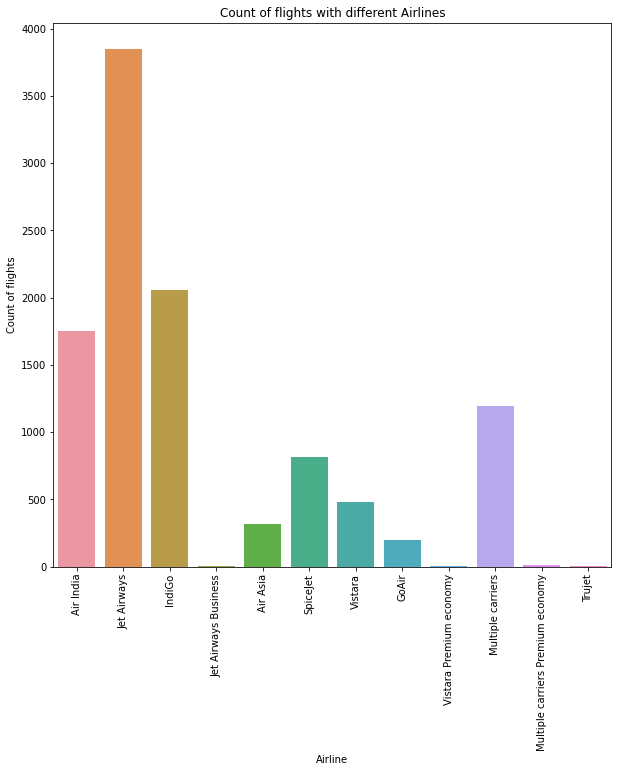

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

* There are more number of flights of Jet Airways. 
* Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

#### Converting sparse classes of Airline into one category

In [ ]:
df['Airline'].replace(['Trujet', 'Vistara Premium economy'], 'Another', inplace = True)

#### Converting the Total_Stops into numbers and dropping the rows with NaN.

In [ ]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,2019,6,5


In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
def convert_into_stops(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non stop':
        return 0

In [ ]:
df['Total_Stops'] = df['Total_Stops'].map(convert_into_stops)

In [ ]:
df.fillna(0, inplace  = True)
df['Total_Stops'] = df['Total_Stops'].apply(lambda x : int(x))

#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

In [ ]:
def flight_dep_time(X):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [ ]:
df['flight_time'] = df['Dep_Time'].apply(flight_dep_time)

Text(0, 0.5, 'Count of flights')

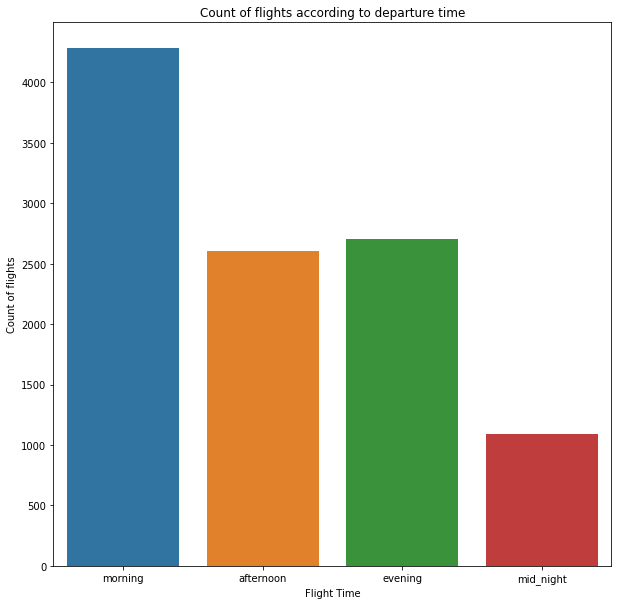

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'flight_time', data = df)
plt.xlabel('Flight Time')
plt.ylabel('Count of flights')

* There are more number of flights in the morning time as compared to other time.

#### Converting the flight duration into seconds.

In [ ]:
def convert_into_seconds(X):
    '''
    This function takes the total time of flight from
    one city to another and converts it into the seconds.
    '''
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df['Duration(sec)'] = df['Duration'].map(convert_into_seconds)

Text(0, 0.5, 'Price of ticket')

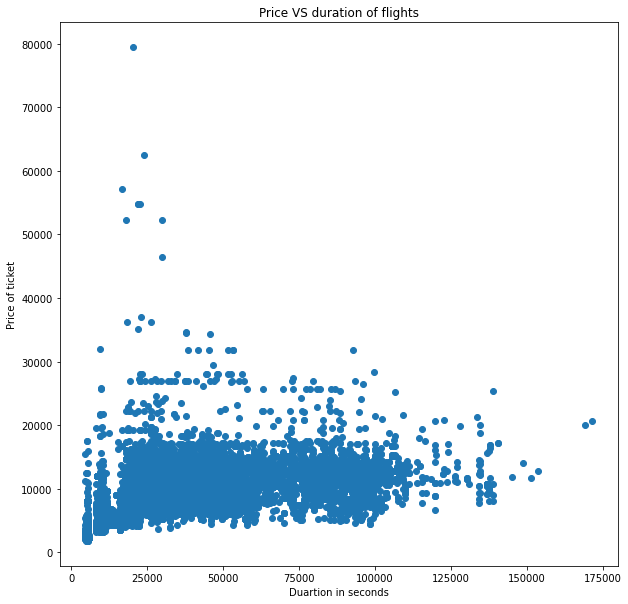

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Price VS duration of flights')
plt.scatter(df['Duration(sec)'], df['Price'])
plt.xlabel('Duartion in seconds')
plt.ylabel('Price of ticket')

In [ ]:
df.corr()

,Total_Stops,Price,year,month,Day,Duration(sec)
Total_Stops,1.000000,0.603897,NaN,0.065495,-0.024136,0.738204
Price,0.603897,1.000000,NaN,0.010705,-0.165448,0.506604
year,NaN,NaN,NaN,NaN,NaN,NaN
month,0.065495,0.010705,NaN,1.000000,-0.264896,0.055147
Day,-0.024136,-0.165448,NaN,-0.264896,1.000000,-0.038422
Duration(sec),0.738204,0.506604,NaN,0.055147,-0.038422,1.000000


It is important to notice that the correlation for 'year' is shown NaN. This is because that feature is not vary at all.

#### Dropping the duplicate rows.

In [ ]:
df.shape

(10682, 16)

In [ ]:
df = df.drop_duplicates()
df.shape

(10462, 16)

It looks like there were around 220 duplicate rows. So it is good idea to drop them.

#### Handling the Typos

In [ ]:
df['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', 'No Info', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

'No info' is same as 'No Info'. So replacing them with single common label.

In [ ]:
df['Additional_Info'].replace('No Info', 'No info', inplace = True)

C:\Anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

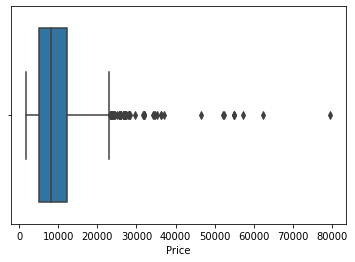

In [ ]:
sns.boxplot(df['Price'])

As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be flight ticket price also.

#### Before we move to the next module, let's save the new dataframe that we have cleaned.

In [ ]:
df.to_csv('cleaned_data.csv', index = None)

#### Encoding the dummy varibales (for categorical features).

In [ ]:
df = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination', 'Additional_Info', 'flight_time'])

In [ ]:
pd.set_option('display.max_columns', 50)
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,year,month,Day,Duration(sec),Airline_Air Asia,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,flight_time_afternoon,flight_time_evening,flight_time_mid_night,flight_time_morning
9848,01/03/2019,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2,17135,2019,1,3,140700,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
6024,01/03/2019,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1,14594,2019,1,3,75900,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2405,01/03/2019,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1,22270,2019,1,3,63300,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
10383,01/03/2019,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1,26890,2019,1,3,79500,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
8308,01/03/2019,BLR → DEL,18:25,21:20,2h 55m,0,12649,2019,1,3,10500,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


#### Removing the unused features.

In [ ]:
df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

#### Saving the final dataframe to directory.

In [ ]:
df.to_csv('final_data.csv', index = None)

#### Preparing the data for ML models.

In [ ]:
y = df['Price']
X = df.drop('Price', axis = 1)

#### Data Standardization

In [ ]:
s = StandardScaler()
X = s.fit_transform(X)

In [ ]:
print(X.mean())
X.std()

1.3668201641342015e-18


0.9874208829065749

In [ ]:
# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8369, 40)
The size of training output is (8369,)
**************************************************
The size of testing input is (2093, 40)
The size of testing output is (2093,)


#### Machine Learning Models

#### KNN Regressor

In [ ]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [ ]:
print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(n_neighbors=3)


{'n_neighbors': 3}

In [ ]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [ ]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  1519.2012371590786
R-squared:  0.8941635122423404


In [ ]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2068.609306982841
R-squared:  0.7827974647656806


#### Ridge Regression

In [ ]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [ ]:
print(ridge_regressor.best_estimator_)
ridge_regressor.best_params_

Ridge(alpha=100)


{'alpha': 100}

In [ ]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [ ]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  2619.652124032402
R-squared:  0.685303397248121


In [ ]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  2498.4905025278736
R-squared:  0.6831429698507949


#### Lasso Regressor

In [ ]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [ ]:
print(lasso_regressor.best_estimator_)
lasso_regressor.best_params_

Lasso(alpha=10)


{'alpha': 10}

In [ ]:
y_train_pred =lasso_regressor.predict(X_train) ##Predict train result
y_test_pred =lasso_regressor.predict(X_test) ##Predict test result

In [ ]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  2619.7113689837133
R-squared:  0.6852891629949838


In [ ]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  2495.4706657910297
R-squared:  0.683908454642328


#### Decision Tree Regressor

In [ ]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(max_depth=12)


{'max_depth': 12}

In [ ]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [ ]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1085.0724426921256
R-squared:  0.9460088875090046


In [ ]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1694.7593606939092
R-squared:  0.8542112460173359


#### Random Forest Regressor

In [ ]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [ ]:
print(random_regressor.best_estimator_)
random_regressor.best_params_

RandomForestRegressor()


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1}

In [ ]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [ ]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  752.308731272166
R-squared:  0.9740464355044142


In [ ]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1636.3324476824448
R-squared:  0.8640901208967379


#### XGBoost Regressor

In [ ]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [ ]:
print(model.best_estimator_)
model.best_params_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.001, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


{'reg_lambda': 0.001,
 'n_estimators': 400,
 'max_depth': 4,
 'learning_rate': 0.1}

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1403.5760993684069
R-squared:  0.9096606967150774


In [ ]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1518.935537486707
R-squared:  0.8828919828270162


## THANK YOU